# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 1. Data Preparation

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [7]:
# splitting data set into train and test
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


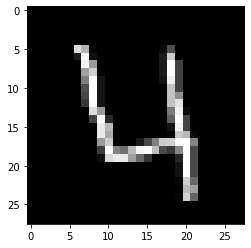

4


In [8]:
#Visualise SOme Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
# some random datasets
drawImg(X_train[3])
print(Y_train[3])
    
    

### Step 2. K-NN

In [9]:
# Can we apply KNN to this data ?

In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

### Step 3 : Make Predictions 

In [11]:
pred = knn(X_train,Y_train,X_test[22])

print(int(pred))

8


In [12]:
Y_train[0:10]
#labels

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [13]:
X_train[0:10]
#the n d pixels used for subtraction and distance calculation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

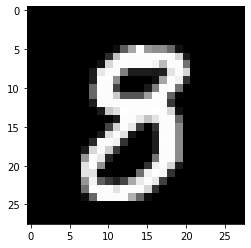

8


In [14]:

drawImg(X_test[22])
print(Y_test[22])

In [15]:
# Write one method which computes accuracy of KNN over the test set !